In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRB24,CHUKWUDI017,DRB24_CHUKWUDI017,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,NaN,Cluster 2,Supermarket Type1,4633.97
1,FDR31,CHUKWUDI019,FDR31_CHUKWUDI019,NaN,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05
2,FDP16,CHUKWUDI017,FDP16_CHUKWUDI017,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,NaN,Cluster 2,Supermarket Type1,14740.81
3,FDY16,CHUKWUDI027,FDY16_CHUKWUDI027,NaN,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33
4,FDY48,CHUKWUDI046,FDY48_CHUKWUDI046,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99


In [4]:
train.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,3141.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,12.870640,0.066613,391.815315,2004.778461,6103.735353
std,4.730432,0.052951,120.204222,8.276712,4456.169125
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.630000,0.026971,308.392500,1994.000000,2728.120000
50%,12.600000,0.053517,393.910000,2006.000000,5374.675000
75%,17.100000,0.095094,466.480000,2011.000000,8524.737500
max,21.350000,0.328391,667.220000,2016.000000,28612.760000


In [5]:
train.isna().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     601
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1126
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

In [6]:
train.Product_Weight.fillna(12.6, inplace=True)

In [7]:
train.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRB24,CHUKWUDI017,DRB24_CHUKWUDI017,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,NaN,Cluster 2,Supermarket Type1,4633.97
1,FDR31,CHUKWUDI019,FDR31_CHUKWUDI019,12.600,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05
2,FDP16,CHUKWUDI017,FDP16_CHUKWUDI017,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,NaN,Cluster 2,Supermarket Type1,14740.81
3,FDY16,CHUKWUDI027,FDY16_CHUKWUDI027,12.600,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33
4,FDY48,CHUKWUDI046,FDY48_CHUKWUDI046,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99


## Questions

* Average product weight for Product fat content
* Average product weight based on product type
* Number of times Product type
* Number of Product Fat Content
* Number of times Supermarket size
* Average product price based on product type
* Average product price based on product fat content
* The product type and product fat content each supermarket has 
* The size of supermarket in each Supermarket_Location_Type (cluster)
* Average Product_Supermarket_Sales based on Supermarket_Location_Type,Supermarket _Size,Supermarket_Type
* Supermarket opening year

In [8]:
#train.Supermarket_Opening_Year.value_counts()

In [99]:
def bar_plot(df,x,y):
    #plt.figure(figsize=(5,3))
    df.groupby(x).mean()[y].sort_values(ascending=False).plot(kind='barh')
    #plt.xlabel(y, fontsize=6)
   # plt.ylabel(x, fontsize=6)
    #plt.tick_params(labelsize=30)
    plt.title('Average ' + y + ' based on ' + x  )
    plt.tight_layout()

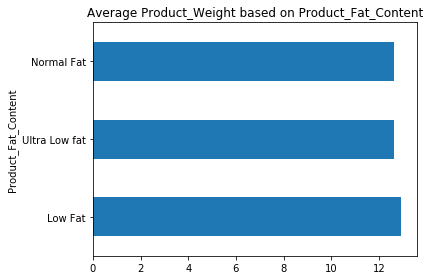

In [100]:
bar_plot(train,'Product_Fat_Content','Product_Weight' )

> The above plot shows the average product weight based on Product Fat Content, from the plot we see that Low fat goods have more weight than Ultra low fat and normal fat

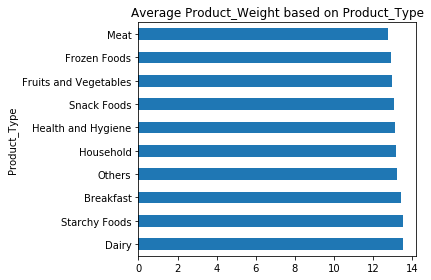

In [28]:
bar_plot(train,'Product_Type','Product_Weight' )

> From the above plot, Diary goods weighs the most while Meat weighs the least

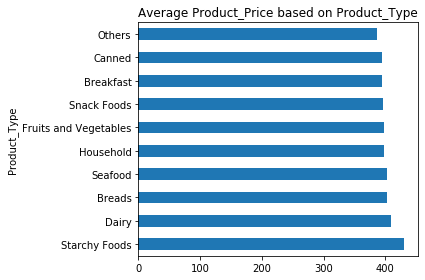

In [29]:
bar_plot(train,'Product_Type','Product_Price' )

> The plot above shows the Price for the different product, here we see that starchy foods are the most expensive

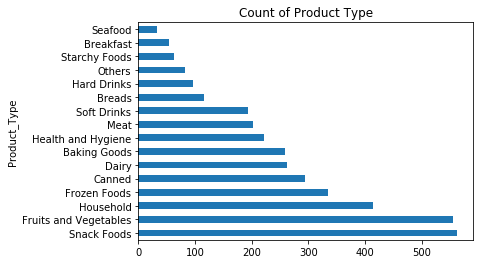

In [102]:
train.groupby('Product_Type')['Product_Type'].count().sort_values(ascending=False).plot(kind='barh')
plt.title('Count of Product Type');

From the plot above, Snack foods occur the most followed by Fruit vegetables

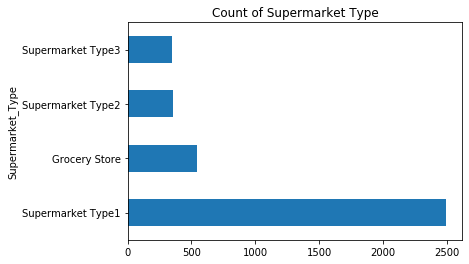

In [103]:
train.groupby('Supermarket_Type')['Supermarket_Type'].count().sort_values(ascending=False).plot(kind='barh')
plt.title('Count of Supermarket Type');

> Supermarket Type occurs the most

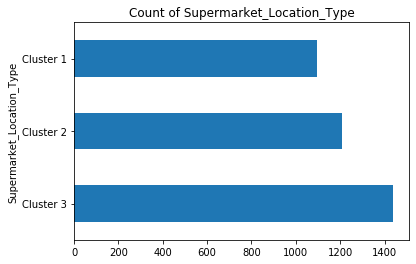

In [104]:
train.groupby('Supermarket_Location_Type')['Supermarket_Location_Type'].count().sort_values(ascending=False).plot(kind='barh')
plt.title('Count of Supermarket_Location_Type');

## Distribution Plots

In [107]:
def dist_plot(col):
    sns.distplot(train[col], color='r')
    plt.title('Distribution plot of ' + col)
    plt.show()
    
    

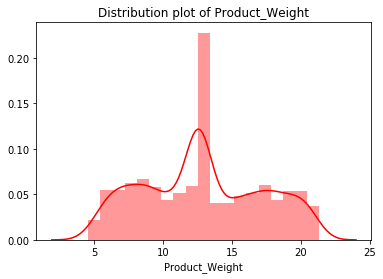

In [108]:
dist_plot('Product_Weight')

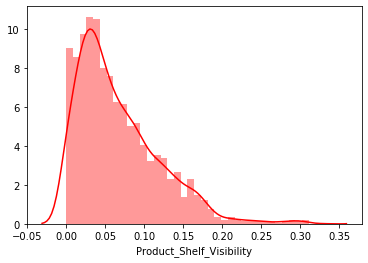

In [36]:
dist_plot('Product_Shelf_Visibility')

In [37]:
#train.Product_Weight.value_counts()

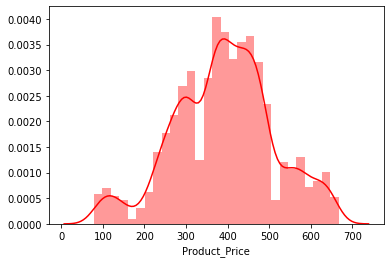

In [38]:
dist_plot('Product_Price')

In [39]:
def count(col):
    sns.countplot(train[col])
    plt.title('Count of '+ col)
    plt.show()

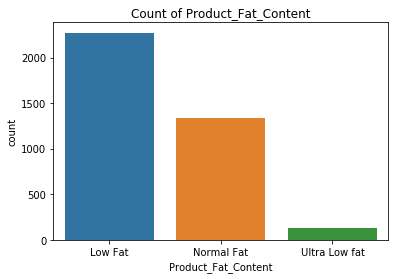

In [40]:
count("Product_Fat_Content")

In [41]:
#train.info()

In [42]:
#count('Product_Type')
#plt.tight_layout()

In [43]:
#plt.plot(train['Product_Type'], kind='bar')

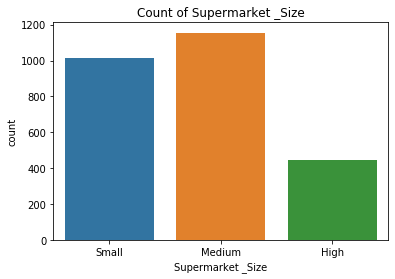

In [44]:
count('Supermarket _Size')

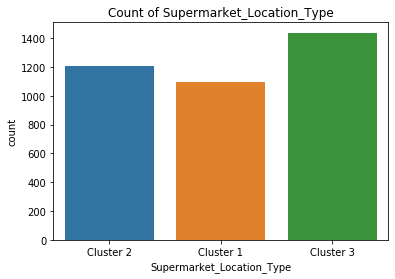

In [45]:
count('Supermarket_Location_Type')

In [109]:
#count('Supermarket_Type')
#plt.tight_layout()
#train.groupby('Supermarket_Type')['Supermarket_Type'].count().sort_values(ascending=False).plot(kind='barh')

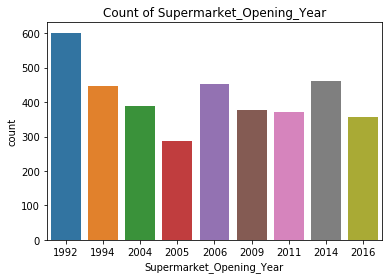

In [49]:
count('Supermarket_Opening_Year')

In [51]:
#train.groupby('Supermarket_Opening_Year')['Supermarket_Opening_Year'].mean().plot(kind='barh')

In [70]:
#train.info()

In [67]:
def scatter_plot(a,b, data=train):
    sns.scatterplot(train[a],train[b])
    plt.title(f'Scatter plot of {a} vs {b} ')

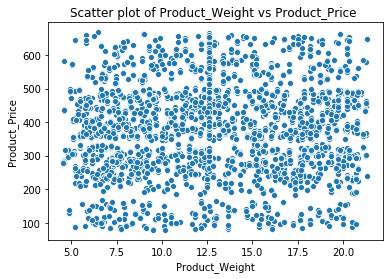

In [69]:
scatter_plot('Product_Weight','Product_Price')

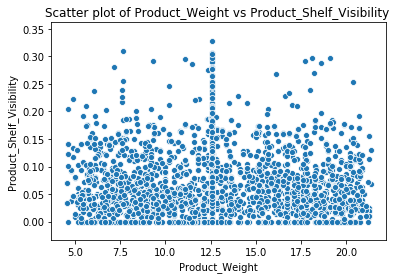

In [71]:
scatter_plot('Product_Weight','Product_Shelf_Visibility')

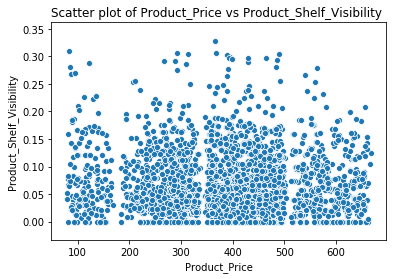

In [74]:
scatter_plot('Product_Price','Product_Shelf_Visibility')

## Multivariate Analysis

In [115]:
def bar_plot(x,y,z, data=train):
    sns.barplot(train[x], train[y], hue=train[z])
    plt.title(x + ' vs ' + y + ' based on ' + z)


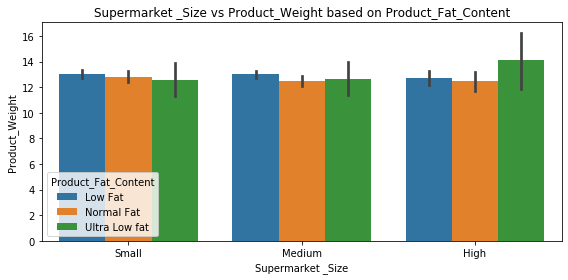

In [116]:
plt.figure(figsize=(8,4))
bar_plot('Supermarket _Size','Product_Weight','Product_Fat_Content')
plt.tight_layout()

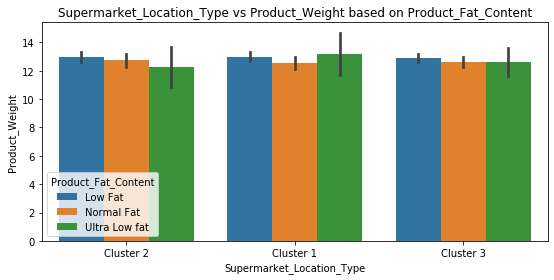

In [117]:
plt.figure(figsize=(8,4))
bar_plot('Supermarket_Location_Type','Product_Weight','Product_Fat_Content')
plt.tight_layout()

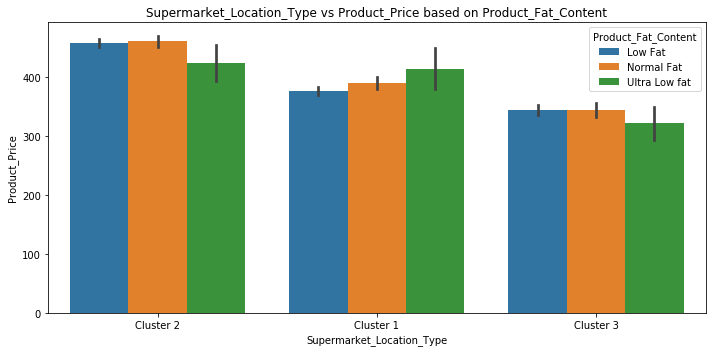

In [118]:
plt.figure(figsize=(10,5))
bar_plot('Supermarket_Location_Type','Product_Price','Product_Fat_Content')
plt.tight_layout()

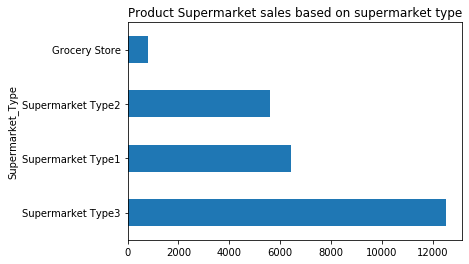

In [135]:
train.groupby('Supermarket_Type')['Product_Supermarket_Sales'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Product Supermarket sales based on supermarket type');

> The above plot shows that supermarket 3 made the most sales

Text(0.5, 1.0, 'Product Type with most sales in Supermarket 3')

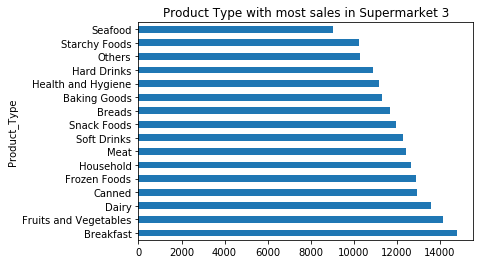

In [136]:
train.groupby(['Supermarket_Type','Product_Type'])['Product_Supermarket_Sales'].mean().loc['Supermarket Type3'].sort_values(ascending=False).plot(kind='barh')
plt.title('Product Type with most sales in Supermarket 3')

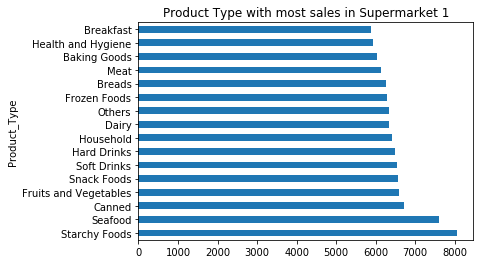

In [137]:
train.groupby(['Supermarket_Type','Product_Type'])['Product_Supermarket_Sales'].mean().loc['Supermarket Type1'].sort_values(ascending=False).plot(kind='barh')
plt.title('Product Type with most sales in Supermarket 1');

Text(0.5, 1.0, 'Product Type with most sales in Supermarket 1')

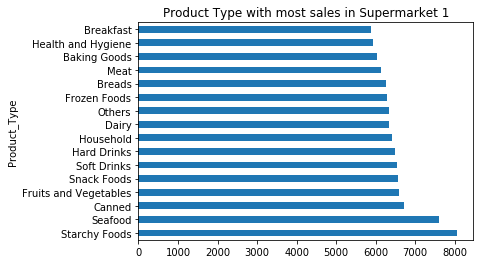

In [138]:
train.groupby(['Supermarket_Type','Product_Type'])['Product_Supermarket_Sales'].mean().loc['Supermarket Type1'].sort_values(ascending=False).plot(kind='barh')
plt.title('Product Type with most sales in Supermarket 1')

Text(0.5, 1.0, 'Product Type with most sales in Grocery Store')

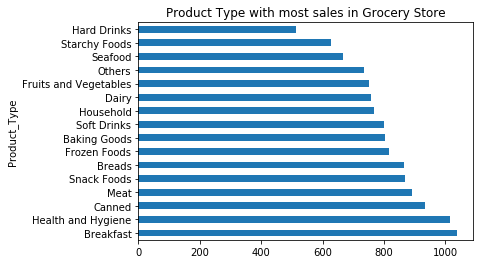

In [139]:
train.groupby(['Supermarket_Type','Product_Type'])['Product_Supermarket_Sales'].mean().loc['Grocery Store'].sort_values(ascending=False).plot(kind='barh')
plt.title('Product Type with most sales in Grocery Store')

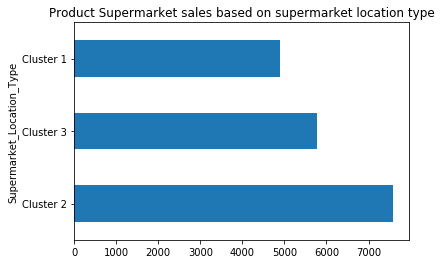

In [140]:
train.groupby('Supermarket_Location_Type')['Product_Supermarket_Sales'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Product Supermarket sales based on supermarket location type');

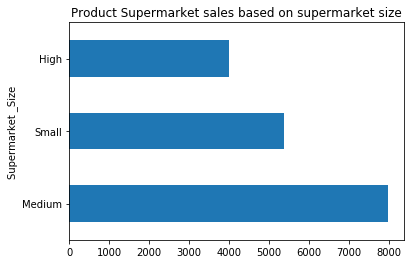

In [141]:
train.groupby('Supermarket _Size')['Product_Supermarket_Sales'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Product Supermarket sales based on supermarket size');

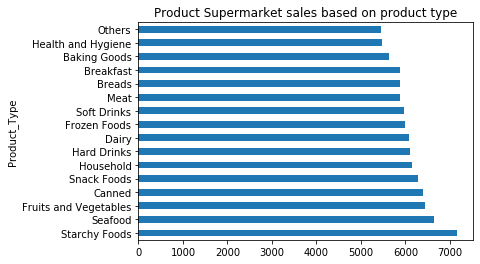

In [142]:
train.groupby('Product_Type')['Product_Supermarket_Sales'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Product Supermarket sales based on product type');

> Most product supermarket sales came from starchy foods

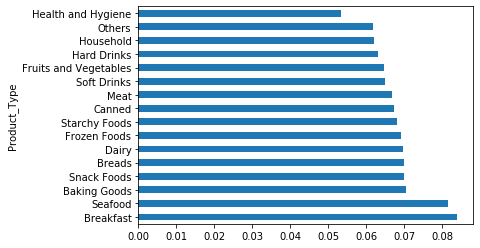

In [93]:
train.groupby('Product_Type')['Product_Shelf_Visibility'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Product Shelf Visibility sales based on Product Type');

> Breakfast is the product type with the highest visibility

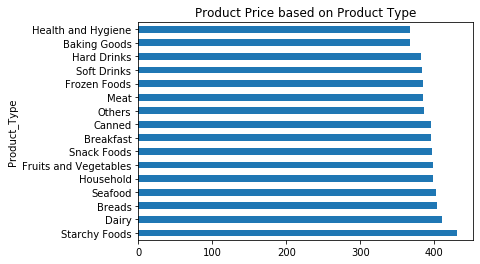

In [143]:
train.groupby('Product_Type')['Product_Price'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Product Price based on Product Type');

> Starchy foods are the most expensive